## Normal CNN

Epoch 1: Loss = 1.5885, Accuracy = 0.4182, Val Loss = 1.1988, Val Accuracy = 0.5728
Epoch 10: Loss = 0.6529, Accuracy = 0.7705, Val Loss = 0.8540, Val Accuracy = 0.7171
Epoch 20: Loss = 0.4300, Accuracy = 0.8439, Val Loss = 1.0270, Val Accuracy = 0.7256
Epoch 30: Loss = 0.3354, Accuracy = 0.8788, Val Loss = 1.3700, Val Accuracy = 0.7201
Epoch 40: Loss = 0.2835, Accuracy = 0.8999, Val Loss = 1.4698, Val Accuracy = 0.7221
Epoch 50: Loss = 0.2538, Accuracy = 0.9114, Val Loss = 1.6371, Val Accuracy = 0.7170
Epoch 60: Loss = 0.2317, Accuracy = 0.9210, Val Loss = 1.7431, Val Accuracy = 0.7179
Epoch 70: Loss = 0.2156, Accuracy = 0.9267, Val Loss = 2.0630, Val Accuracy = 0.7234
Epoch 80: Loss = 0.2193, Accuracy = 0.9270, Val Loss = 1.9906, Val Accuracy = 0.7192
Epoch 90: Loss = 0.2005, Accuracy = 0.9340, Val Loss = 2.2812, Val Accuracy = 0.7201
Epoch 100: Loss = 0.1949, Accuracy = 0.9373, Val Loss = 2.2800, Val Accuracy = 0.7130

Final Test Accuracy: 0.7130
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/st

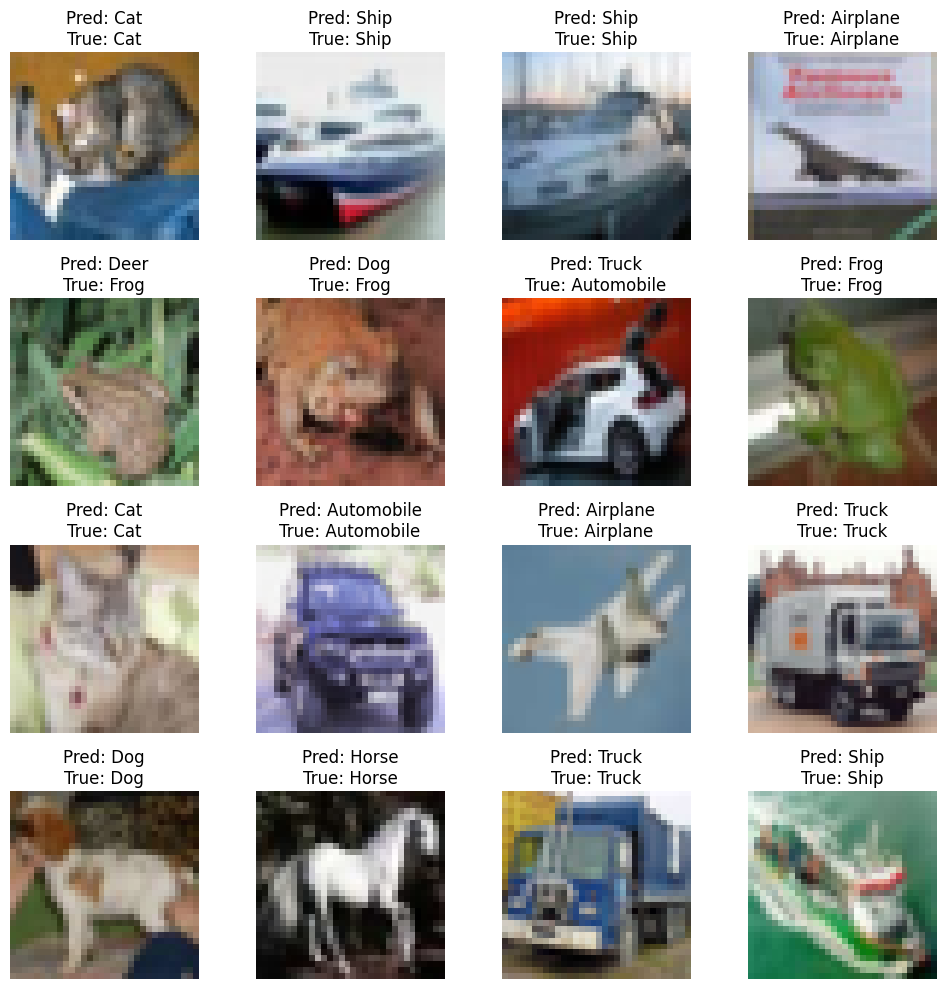

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# 1. Loading and preprocessing the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalizing the images to the range 0-1
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encoding the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Class names for CIFAR-10
class_names = ["Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog",
               "Frog", "Horse", "Ship", "Truck"]

# Defining the CNN model
model = models.Sequential([
    layers.Input(shape=(32, 32, 3)),  # Explicitly defining input shape (compatible with the current tf version)
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='linear')  # Output layer for logits
])

# Purpose: Dropout is a regularization technique used to prevent overfitting.
# Details: During training, this layer randomly sets 50% of the input units to 0 at each update,
# which helps the model generalize better by not relying too heavily on any single feature.

# Compiling the model
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),  # For numerical stability
    metrics=['accuracy']
)

# Custom Callback to show verbose every 10 epochs
class CustomVerbose(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        # prints logs after every 10 epochs
        if (epoch + 1) % 10 == 0 or epoch == 0:
            print(f"Epoch {epoch + 1}: Loss = {logs['loss']:.4f}, Accuracy = {logs['accuracy']:.4f}, "
                  f"Val Loss = {logs['val_loss']:.4f}, Val Accuracy = {logs['val_accuracy']:.4f}")

# Training the model and printing loss and accuracy every 10 epochs
history = model.fit(
    x_train, y_train,
    epochs=100,
    batch_size=20,
    validation_data=(x_test, y_test),
    callbacks=[CustomVerbose()],  # Adding the custom callback
    verbose=0   # Turn off default epoch-by-epoch verbose
)

# Printing final accuracy
final_loss, final_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"\nFinal Test Accuracy: {final_accuracy:.4f}")

# Visualizing some predictions
def plot_predictions(model, x_test, y_test, class_names):

    predictions = model.predict(x_test[:16])
    predicted_classes = np.argmax(predictions, axis=1)
    actual_classes = np.argmax(y_test[:16], axis=1)

    # Plotting images with predictions
    plt.figure(figsize=(10, 10))
    for i in range(16):
        plt.subplot(4, 4, i + 1)
        plt.imshow(x_test[i])
        plt.title(f"Pred: {class_names[predicted_classes[i]]}\nTrue: {class_names[actual_classes[i]]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Predicted vs actual images
plot_predictions(model, x_test, y_test, class_names)

### **2. AlexNet**




170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Epoch 1: Loss = 1.3735, Accuracy = 0.5131, Val Loss = 1.7384, Val Accuracy = 0.4534
Epoch 10: Loss = 0.1751, Accuracy = 0.9411, Val Loss = 1.0403, Val Accuracy = 0.7519
Epoch 20: Loss = 0.0561, Accuracy = 0.9811, Val Loss = 1.0157, Val Accuracy = 0.8010
Epoch 30: Loss = 0.0348, Accuracy = 0.9881, Val Loss = 1.6931, Val Accuracy = 0.7185
Epoch 40: Loss = 0.0249, Accuracy = 0.9917, Val Loss = 1.4157, Val Accuracy = 0.7856
Epoch 50: Loss = 0.0177, Accuracy = 0.9943, Val Loss = 1.5077, Val Accuracy = 0.7962
Epoch 60: Loss = 0.0163, Accuracy = 0.9947, Val Loss = 1.1900, Val Accuracy = 0.8233
Epoch 70: Loss = 0.0119, Accuracy = 0.9959, Val Loss = 1.2848, Val Accuracy = 0.8152
Epoch 80: Loss = 0.0093, Accuracy = 0.9969, Val Loss = 1.6989, Val Accuracy = 0.7923
Epoch 90: Loss = 0.0126, Accuracy = 0.9960, Val Loss = 1.3630, Val Accuracy = 0.8132
Epoch 100: Loss = 0.0099, Accuracy = 0.9969, Val Loss = 1.3739, Val Accuracy = 0.8224

Final Test 

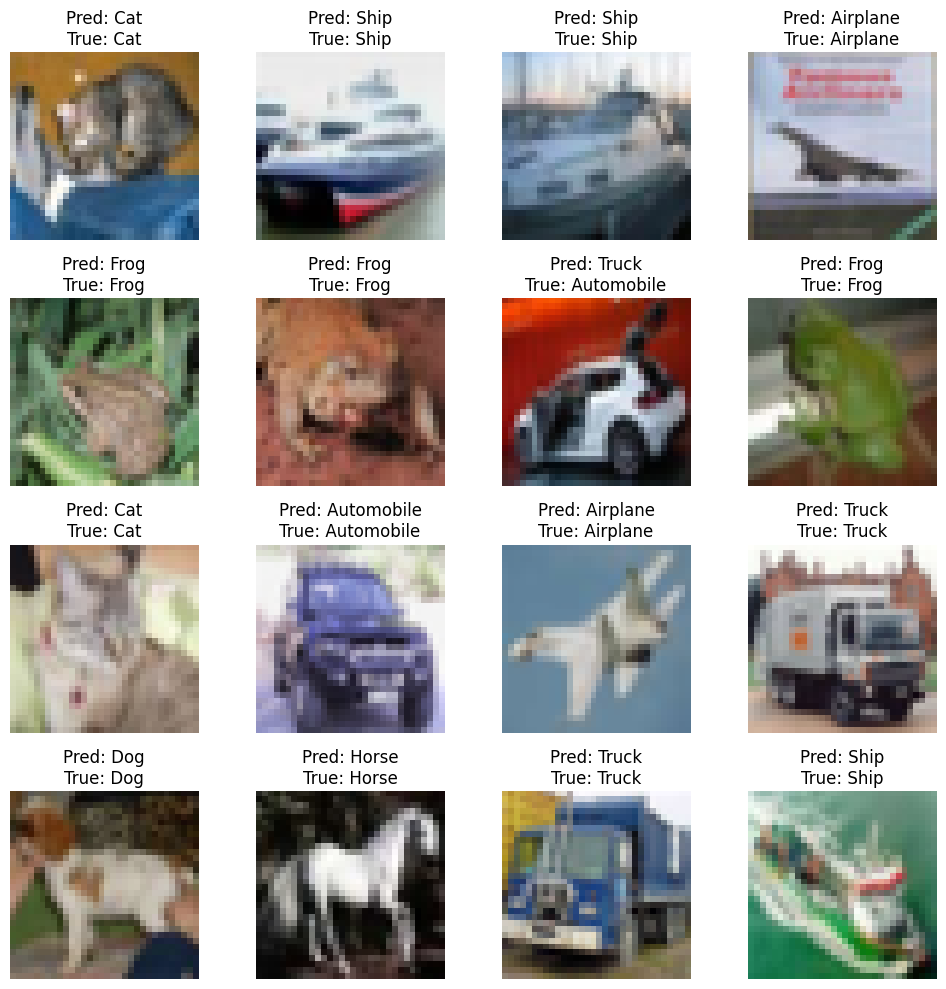

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# Loading and preprocess the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalizing pixel values to range 0-1
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encoding the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Class names for CIFAR-10
class_names = ["Airplane", "Automobile", "Bird", "Cat", "Deer",
               "Dog", "Frog", "Horse", "Ship", "Truck"]

# AlexNet model
model = models.Sequential([
    # 1st Convolutional Layer
    layers.Conv2D(64, (3, 3), strides=1, padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2), strides=2),

    # 2nd Convolutional Layer
    layers.Conv2D(128, (3, 3), strides=1, padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2), strides=2),

    # 3rd Convolutional Layer
    layers.Conv2D(256, (3, 3), strides=1, padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2), strides=2),

    # 4th Convolutional Layer
    layers.Conv2D(512, (3, 3), strides=1, padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),

    # 5th Convolutional Layer
    layers.Conv2D(512, (3, 3), strides=1, padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),

    # Global Average Pooling to reduce parameters
    layers.GlobalAveragePooling2D(),

    # Fully Connected Layer
    layers.Dense(256),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.5),

    # Output Layer
    layers.Dense(10, activation='softmax')  # 10 classes for CIFAR-10
])

# model = models.Sequential([
#     # 1st Convolutional Layer
#     layers.Conv2D(96, (5, 5), strides=2, activation='relu', input_shape=(32, 32, 3)),
#     layers.BatchNormalization(),
#     layers.MaxPooling2D((2, 2), strides=2),  # Use smaller pooling kernel size

#     # 2nd Convolutional Layer
#     layers.Conv2D(256, (5, 5), padding='same', activation='relu'),
#     layers.BatchNormalization(),
#     layers.MaxPooling2D((2, 2), strides=2),  # Use smaller pooling kernel size

#     # 3rd Convolutional Layer
#     layers.Conv2D(384, (3, 3), padding='same', activation='relu'),

#     # 4th Convolutional Layer
#     layers.Conv2D(384, (3, 3), padding='same', activation='relu'),

#     # 5th Convolutional Layer
#     layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
#     layers.MaxPooling2D((2, 2), strides=2),  # Use smaller pooling kernel size

#     # Flattening the feature maps
#     layers.Flatten(),

#     # 1st Fully Connected Layer
#     layers.Dense(4096, activation='relu'),
#     layers.Dropout(0.5),

#     # 2nd Fully Connected Layer
#     layers.Dense(4096, activation='relu'),
#     layers.Dropout(0.5),

#     # Output Layer
#     layers.Dense(10, activation='softmax')  # 10 classes for CIFAR-10
# ])

# Compiling the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Custom Callback to show verbose every 10 epochs
class CustomVerbose(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        # prints logs after every 10 epochs
        if (epoch + 1) % 10 == 0 or epoch == 0:
            print(f"Epoch {epoch + 1}: Loss = {logs['loss']:.4f}, Accuracy = {logs['accuracy']:.4f}, "
                  f"Val Loss = {logs['val_loss']:.4f}, Val Accuracy = {logs['val_accuracy']:.4f}")

# Training the model and print loss and accuracy every 10 epochs
history = model.fit(
    x_train, y_train,
    epochs=100,
    batch_size=50,
    validation_data=(x_test, y_test),
    callbacks=[CustomVerbose()],  # Adding the custom callback
    verbose=0  # Turn off default epoch-by-epoch verbose
)

# final accuracy
final_loss, final_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"\nFinal Test Accuracy: {final_accuracy:.4f}")

# Visualizing some predictions
def plot_predictions(model, x_test, y_test, class_names):
    # Get predictions
    predictions = model.predict(x_test[:16])
    predicted_classes = np.argmax(predictions, axis=1)
    actual_classes = np.argmax(y_test[:16], axis=1)

    # images with predictions
    plt.figure(figsize=(10, 10))
    for i in range(16):
        plt.subplot(4, 4, i + 1)
        plt.imshow(x_test[i])
        plt.title(f"Pred: {class_names[predicted_classes[i]]}\nTrue: {class_names[actual_classes[i]]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# predicted vs actual images
plot_predictions(model, x_test, y_test, class_names)

Epoch 1: Loss = 1.5851, Accuracy = 0.4233, Val Loss = 1.9749, Val Accuracy = 0.3501
Epoch 10: Loss = 0.4492, Accuracy = 0.8580, Val Loss = 1.1942, Val Accuracy = 0.6879
Epoch 20: Loss = 0.2210, Accuracy = 0.9397, Val Loss = 1.5022, Val Accuracy = 0.6830
Epoch 30: Loss = 0.2013, Accuracy = 0.9483, Val Loss = 1.4072, Val Accuracy = 0.6869
Epoch 40: Loss = 0.1295, Accuracy = 0.9685, Val Loss = 1.5412, Val Accuracy = 0.7025
Epoch 50: Loss = 0.1082, Accuracy = 0.9744, Val Loss = 2.2891, Val Accuracy = 0.7036
Epoch 60: Loss = 0.1017, Accuracy = 0.9777, Val Loss = 1.7924, Val Accuracy = 0.7132
Epoch 70: Loss = 0.1186, Accuracy = 0.9750, Val Loss = 1.8703, Val Accuracy = 0.7080
Epoch 80: Loss = 0.2143, Accuracy = 0.9627, Val Loss = 1.8241, Val Accuracy = 0.7011
Epoch 90: Loss = 0.0811, Accuracy = 0.9840, Val Loss = 2.1153, Val Accuracy = 0.7009
Epoch 100: Loss = 0.0900, Accuracy = 0.9830, Val Loss = 2.5180, Val Accuracy = 0.6853

Final Test Accuracy: 0.6854
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/st

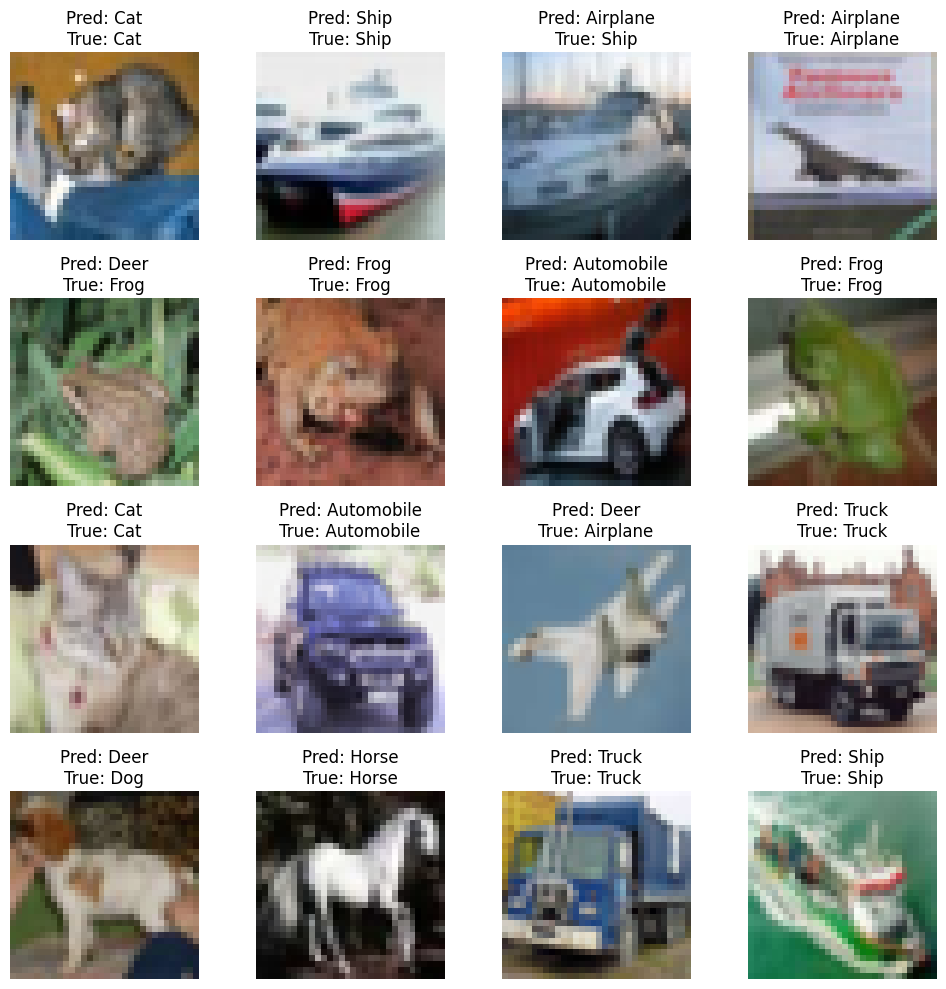

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# Loading and preprocess the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalizing pixel values to range 0-1
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encoding the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Class names for CIFAR-10
class_names = ["Airplane", "Automobile", "Bird", "Cat", "Deer",
               "Dog", "Frog", "Horse", "Ship", "Truck"]

# AlexNet model
model = models.Sequential([
    # 1st Convolutional Layer
    layers.Conv2D(96, (5, 5), strides=2, activation='relu', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2), strides=2),  # Use smaller pooling kernel size

    # 2nd Convolutional Layer
    layers.Conv2D(256, (5, 5), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2), strides=2),  # Use smaller pooling kernel size

    # 3rd Convolutional Layer
    layers.Conv2D(384, (3, 3), padding='same', activation='relu'),

    # 4th Convolutional Layer
    layers.Conv2D(384, (3, 3), padding='same', activation='relu'),

    # 5th Convolutional Layer
    layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2), strides=2),  # Use smaller pooling kernel size

    # Flattening the feature maps
    layers.Flatten(),

    # 1st Fully Connected Layer
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),

    # 2nd Fully Connected Layer
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),

    # Output Layer
    layers.Dense(10, activation='softmax')  # 10 classes for CIFAR-10
])

# Compiling the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Custom Callback to show verbose every 10 epochs
class CustomVerbose(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        # prints logs after every 10 epochs
        if (epoch + 1) % 10 == 0 or epoch == 0:
            print(f"Epoch {epoch + 1}: Loss = {logs['loss']:.4f}, Accuracy = {logs['accuracy']:.4f}, "
                  f"Val Loss = {logs['val_loss']:.4f}, Val Accuracy = {logs['val_accuracy']:.4f}")

# Training the model and print loss and accuracy every 10 epochs
history = model.fit(
    x_train, y_train,
    epochs=100,
    batch_size=50,
    validation_data=(x_test, y_test),
    callbacks=[CustomVerbose()],  # Adding the custom callback
    verbose=0  # Turn off default epoch-by-epoch verbose
)

# final accuracy
final_loss, final_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"\nFinal Test Accuracy: {final_accuracy:.4f}")

# Visualizing some predictions
def plot_predictions(model, x_test, y_test, class_names):
    # Get predictions
    predictions = model.predict(x_test[:16])
    predicted_classes = np.argmax(predictions, axis=1)
    actual_classes = np.argmax(y_test[:16], axis=1)

    # images with predictions
    plt.figure(figsize=(10, 10))
    for i in range(16):
        plt.subplot(4, 4, i + 1)
        plt.imshow(x_test[i])
        plt.title(f"Pred: {class_names[predicted_classes[i]]}\nTrue: {class_names[actual_classes[i]]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# predicted vs actual images
plot_predictions(model, x_test, y_test, class_names)






### **3. ResNet (Residual Network)**




Epoch 1: Loss = 0.1142, Accuracy = 0.9787, Val Loss = 2.3524, Val Accuracy = 0.7244
Epoch 10: Loss = 0.3197, Accuracy = 0.9253, Val Loss = 1.2994, Val Accuracy = 0.7010
Epoch 20: Loss = 0.1075, Accuracy = 0.9820, Val Loss = 2.9698, Val Accuracy = 0.7093
Epoch 30: Loss = 0.0782, Accuracy = 0.9840, Val Loss = 2.8415, Val Accuracy = 0.7239
Epoch 40: Loss = 0.1125, Accuracy = 0.9814, Val Loss = 1.7309, Val Accuracy = 0.6978
Epoch 50: Loss = 0.1347, Accuracy = 0.9753, Val Loss = 1.8028, Val Accuracy = 0.7122
Epoch 60: Loss = 0.1082, Accuracy = 0.9811, Val Loss = 2.0847, Val Accuracy = 0.7074
Epoch 70: Loss = 0.1162, Accuracy = 0.9794, Val Loss = 3.6272, Val Accuracy = 0.7019
Epoch 80: Loss = 0.0689, Accuracy = 0.9876, Val Loss = 2.9445, Val Accuracy = 0.7028
Epoch 90: Loss = 0.1001, Accuracy = 0.9836, Val Loss = 2.4656, Val Accuracy = 0.6948
Epoch 100: Loss = 0.0977, Accuracy = 0.9853, Val Loss = 2.4439, Val Accuracy = 0.7089

Final Test Accuracy: 0.7089
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/ste

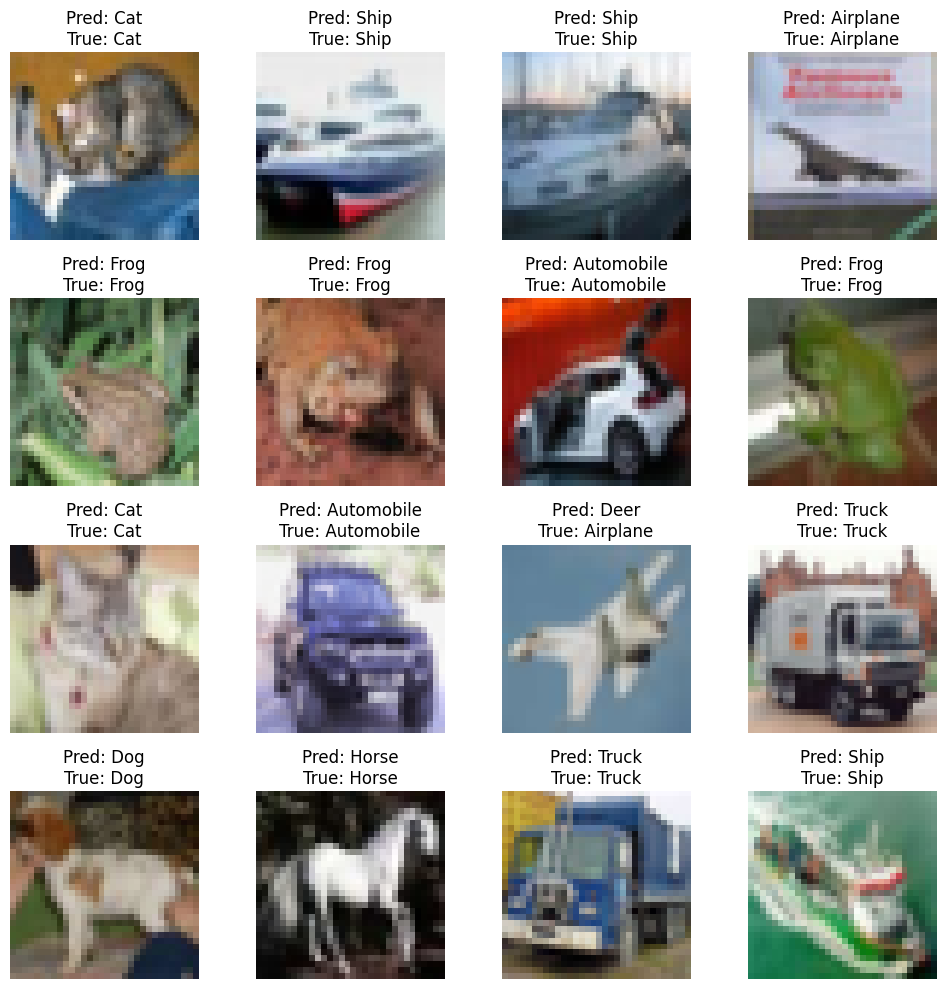

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50
import matplotlib.pyplot as plt
import numpy as np

# Loading and preprocessing the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalizing pixel values to the range 0-1
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encoding the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Class names for CIFAR-10
class_names = ["Airplane", "Automobile", "Bird", "Cat", "Deer",
               "Dog", "Frog", "Horse", "Ship", "Truck"]

# ResNet-50 model using Transfer Learning
base_model = ResNet50(
    weights=None,                 # Start training from scratch (no pre-trained weights)
    input_shape=(32, 32, 3),      # Input shape of CIFAR-10 images
    classes=10,                   # Number of output classes
    include_top=True              # Include the fully connected layer at the top
)

# Compiling the model
base_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Custom Callback to show verbose every 10 epochs
class CustomVerbose(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        # prints logs after every 10 epochs
        if (epoch + 1) % 10 == 0 or epoch == 0:
            print(f"Epoch {epoch + 1}: Loss = {logs['loss']:.4f}, Accuracy = {logs['accuracy']:.4f}, "
                  f"Val Loss = {logs['val_loss']:.4f}, Val Accuracy = {logs['val_accuracy']:.4f}")

# Training the model and printing loss and accuracy every 10 epochs
history = model.fit(
    x_train, y_train,
    epochs=100,
    batch_size=50,
    validation_data=(x_test, y_test),
    callbacks=[CustomVerbose()],  # Adding the custom callback
    verbose=0  # Turn off default epoch-by-epoch verbose
)

# final accuracy
final_loss, final_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"\nFinal Test Accuracy: {final_accuracy:.4f}")

# Visualizing some predictions
def plot_predictions(model, x_test, y_test, class_names):
    # predictions
    predictions = model.predict(x_test[:16])
    predicted_classes = np.argmax(predictions, axis=1)
    actual_classes = np.argmax(y_test[:16], axis=1)

    # Plotting images with predictions
    plt.figure(figsize=(10, 10))
    for i in range(16):
        plt.subplot(4, 4, i + 1)
        plt.imshow(x_test[i])
        plt.title(f"Pred: {class_names[predicted_classes[i]]}\nTrue: {class_names[actual_classes[i]]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# predicted vs actual images
plot_predictions(model, x_test, y_test, class_names)


### **Comparison Table**

| **Feature**              | **Normal CNN**         | **AlexNet**                     | **ResNet**                       |
|---------------------------|------------------------|----------------------------------|-----------------------------------|
| **Year Introduced**       | Basic Architecture     | 2012                            | 2015                             |
| **Depth**                 | Shallow               | Moderate (8 layers)             | Very Deep (18–152+ layers)       |
| **Key Innovation**        | None                  | Dropout, ReLU, Data Augmentation| Skip Connections (Residuals)     |
| **Vanishing Gradient Issue** | Present              | Somewhat mitigated              | Resolved with skip connections   |
| **Training Time**         | Fast                  | Moderate                        | Slower but efficient             |
| **Use Case**              | Small datasets/tasks  | ImageNet-scale classification   | Large datasets/tasks, deep learning |
| **Performance**           | Basic                 | Breakthrough (2012 ImageNet)    | State-of-the-art (ImageNet 2015) |


